In [39]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
df = pd.read_csv("./Housing.csv")
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [41]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [42]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [43]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


<Axes: >

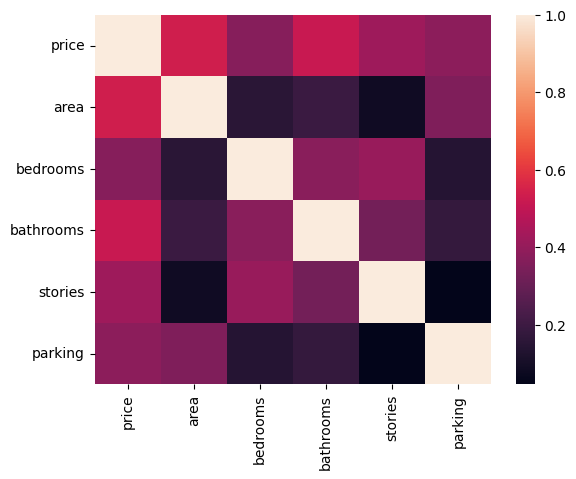

In [44]:
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix)

In [45]:
target_col = "price"
corr_thresh_upper = 0.2
corr_thresh_lower = -0.25

columns = corr_matrix[target_col][(corr_matrix[target_col] > corr_thresh_upper) | (corr_matrix[target_col] < corr_thresh_lower)].index.tolist()

In [46]:
columns.pop(-1)

'parking'

In [47]:
columns

['price', 'area', 'bedrooms', 'bathrooms', 'stories']

In [48]:
y = df[target_col]
x = df[columns]

In [49]:
x

,price,area,bedrooms,bathrooms,stories
0,13300000,7420,4,2,3
1,12250000,8960,4,4,4
2,12250000,9960,3,2,2
3,12215000,7500,4,2,2
4,11410000,7420,4,1,2
...,...,...,...,...,...
540,1820000,3000,2,1,1
541,1767150,2400,3,1,1
542,1750000,3620,2,1,1
543,1750000,2910,3,1,1


In [50]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [51]:
x_train

,price,area,bedrooms,bathrooms,stories
46,7525000,6000,3,2,4
93,6300000,7200,3,2,1
335,3920000,3816,2,1,1
412,3430000,2610,3,1,2
471,3010000,3750,3,1,2
...,...,...,...,...,...
71,6755000,6000,4,2,4
106,6160000,5450,4,2,1
270,4340000,4500,3,2,3
435,3290000,4040,2,1,1


In [52]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [53]:
y_pred = lr.predict(x_test)

In [54]:
lr.coef_

array([ 1.00000000e+00, -1.01284334e-15, -1.45783594e-10,  8.37331935e-11,
        2.20536704e-10])

In [55]:
list(zip(x,lr.coef_))

[('price', 1.0000000000000013),
 ('area', -1.0128433385373536e-15),
 ('bedrooms', -1.4578359438621428e-10),
 ('bathrooms', 8.37331935351663e-11),
 ('stories', 2.2053670410054373e-10)]

In [56]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
Mean_absolute_error = mean_absolute_error(y_test,y_pred)
Mean_squared_error = mean_squared_error(y_test,y_pred)
Root_mean_squared_error = np.sqrt(Mean_squared_error)
R_squared = lr.score(x,y)

In [57]:
print(f"Mean_absolute_error: {Mean_absolute_error}")
print(f"Mean_squared_error: {Mean_squared_error}")
print(f"Root_mean_squared_error: {Root_mean_squared_error}")
print(f"R_squared: {R_squared}")

Mean_absolute_error: 2.5440485925849426e-09
Mean_squared_error: 1.0602800970283702e-17
Root_mean_squared_error: 3.256194246399269e-09
R_squared: 1.0
